In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [144]:
sns.set_style('whitegrid')

In [145]:
temp = pd.read_pickle('df_of_imdb_data.pkl')
temp['rating'] = temp['rating'].apply(lambda x: x if type(x) == float else np.nan)
temp['runtimes'] = temp['runtimes'].apply(lambda x: int(x[0]) if type(x[0]) == str else np.nan)
temp['metascore'] = temp['metascore'].apply(lambda x: int(x['data']['metascore']) if 'metascore' in x['data'].keys() else np.nan)

In [6]:
temp.head()

,imdb_id,titles,year,original_air_date,countries,language,genres,certificates,rating,votes,color_info,runtimes,box_office,producers,directors,production_company,distributors,metascore,is_nominee
0,0388130,Initial D: Third Stage,2001,13 Jan 2001 (Japan),[Japan],"[en, ja, cmn]","[Animation, Action, Romance, Sport]","[Australia:PG, Japan:G, United States:TV-PG]",7.6,1390,[Color],100,[],[2246748],"[1245306, 1564830]","[0179653, 0021660, 0099762, 0113955, 0036168]","[0179653, 0053157, 0039940, 0921883]",NaN,0
1,0273772,Don't Make Trouble!,2001,17 Jan 2001 (France),[France],"[fr, ar]","[Animation, Drama, Comedy]",[France:Tous publics],6.6,49,[Color],70,[],"[1007620, 0099748, 0501590, 0851724]","[0002174, 0071117, 0099379, 0181117, 0216816, ...","[0072738, 0069857]",[0038517],NaN,0
2,0243017,Waking Life,2001,07 Mar 2002 (Australia),[United States],[en],"[Animation, Drama, Fantasy]","[Argentina:13, Australia:M, Brazil:Livre, Cana...",7.7,63692,[Color],99,"{'Opening Weekend United States': '$88,977, 21...","[0438210, 0657921, 0782270, 0806189, 0808819, ...",[0000500],"[0028932, 0046530, 0042682, 0054189, 0123642, ...","[0000756, 0028932, 0007180, 0125154, 0067533, ...",83.0,0
3,0291559,Wave Twisters,2001,[],[United States],[en],"[Animation, Adventure, Musical, Sci-Fi]",[United States:Unrated],7.4,551,[Color],46,[],[1029039],"[1000898, 1037263]",[0060259],[],NaN,0
4,0277909,Mutant Aliens,2001,09 Jan 2002 (France),[United States],[en],"[Animation, Comedy, Sci-Fi]","[France:Tous publics, Germany:16, South Korea:...",6.6,1204,[Color],81,"{'Budget': '$200,000 (estimated)'}","[0390350, 0687739]",[0687739],[0077590],"[0068070, 0112126, 0084806]",39.0,0


In [146]:
from sklearn.model_selection import train_test_split
imdb_train, imdb_test = train_test_split(temp, test_size=0.2, shuffle=True, stratify=temp['is_nominee'], random_state=126029)

In [147]:
imdb_train['countries'].explode().value_counts().head(10)

United States     1017
Japan              729
France             184
China              167
United Kingdom     165
Germany            138
Canada             130
Russia             110
Spain              107
India              100
Name: countries, dtype: int64

In [148]:
def make_df_countries(df):
    us = [1 if 'United States' in x else 0 for x in df['countries']]
    japan = [1 if 'Japan' in x else 0 for x in df['countries']]
    france = [1 if 'France' in x else 0 for x in df['countries']]
    china = [1 if 'China' in x else 0 for x in df['countries']]
    uk = [1 if 'United Kingdom' in x else 0 for x in df['countries']]
    dict = {'imdb_id':df['imdb_id'], 'us':us, 'japan':japan, 'france':france, 'china':china, 'uk':uk}
    countries = pd.DataFrame(dict)
    return countries

In [149]:
#takes training dataframe and gives a single country name from the list of countries 
def single_country_name(df):
    country_name = []
    for country in df.countries:
        if 'United States' in country:
            country_name.append('United States')
        elif 'Japan' in country:
            country_name.append('Japan')
        elif 'France' in country:
            country_name.append('France')
        elif 'China' in country:
            country_name.append('China')
        elif 'United Kingdom' in country:
            country_name.append('United Kingdom')
        else:
            country_name.append('Other')
    dict = {'imdb_id':df['imdb_id'], 'country_name':country_name}
    return pd.DataFrame(dict)

In [150]:
countries = make_df_countries(imdb_train)
countries

,imdb_id,us,japan,france,china,uk
1423,2509428,0,0,0,0,0
8,0206367,1,0,0,0,0
2201,5480816,0,0,0,0,0
305,0455142,0,0,1,0,0
3282,11457742,0,0,0,0,0
...,...,...,...,...,...,...
1151,1739212,0,1,0,0,0
2987,8161914,0,1,0,0,0
2243,2822672,1,0,0,1,0
1458,2296044,0,0,0,0,0


In [151]:
imdb_train = imdb_train.join(countries.set_index('imdb_id'), on='imdb_id')

In [152]:
country_name = single_country_name(imdb_train)

In [153]:
imdb_train = imdb_train.join(country_name.set_index('imdb_id'), on='imdb_id')

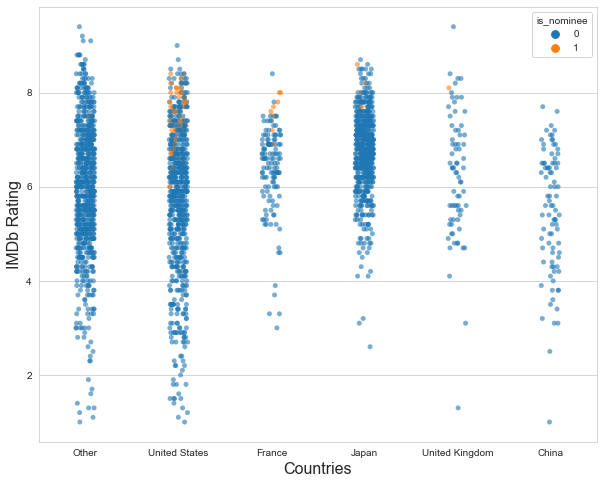

In [163]:
plt.figure(figsize=(10,8))
sns.stripplot(x='country_name', y='rating', data=imdb_train, 
              hue=imdb_train['is_nominee'], alpha=0.6)
plt.xlabel('Countries', fontsize=16)
plt.ylabel('IMDb Rating', fontsize=16)

plt.show()

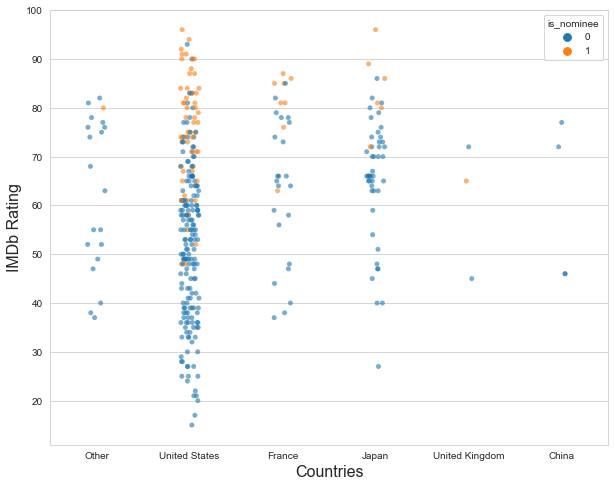

In [164]:
plt.figure(figsize=(10,8))
sns.stripplot(x='country_name', y='metascore', data=imdb_train, 
              hue=imdb_train['is_nominee'], alpha=0.6)
plt.xlabel('Countries', fontsize=16)
plt.ylabel('IMDb Rating', fontsize=16)

plt.show()